In [1]:
# I noticed lots of fluctuation in the graphs when plotting U wrt a temperature range.
# Maybe they are due to the fact that the default number of iterations (10000) are not sufficient to obtain an equilibrium

In [1]:
from euclidianNetwork import EuclidianNetwork
import numpy as np
import math
import random
from tqdm import tqdm

In [30]:
N = 100
delta = 2

g = EuclidianNetwork(N,delta)

initial_state=1
temperature = 10
graph = g.get_graph()
J=1

#(almost) copy-paste of simulation() method

data = {}   #empty dictionary
M = []
m = []
E = []

state = np.random.choice([-1,1], N, p=[1-initial_state, initial_state])
list_of_neigh = {}
for node in g.get_graph().nodes():
    list_of_neigh[node] = list(graph.neighbors(node))

iterations = 100000


for i in tqdm(range(iterations)):

    #Montecarlo
    beta = 1/temperature
    rsnode = np.random.randint(0, N)            # pick a random source node
    s = state[rsnode]                           # get the spin of this node
    ss = np.sum(state[list_of_neigh[rsnode]])   # sum of all neighbouring spins        
    delE = 2.0 * J * ss * s                     # transition energy
    prob = math.exp(-delE * beta)               # calculate transition probability
    if prob > random.random():                  # conditionally accept the transition
        s = -s
    state[rsnode] = s
    #End montecarlo

    M.append(np.sum(state))
    m.append(np.sum(state)/N)

    #Energy
    en = 0.
    for i in range(N):
        ss = np.sum(state[list_of_neigh[i]])
        en += state[i] * ss
    E.append(-0.5 * J * en)


100%|██████████| 100000/100000 [01:06<00:00, 1502.79it/s]


-14.6599

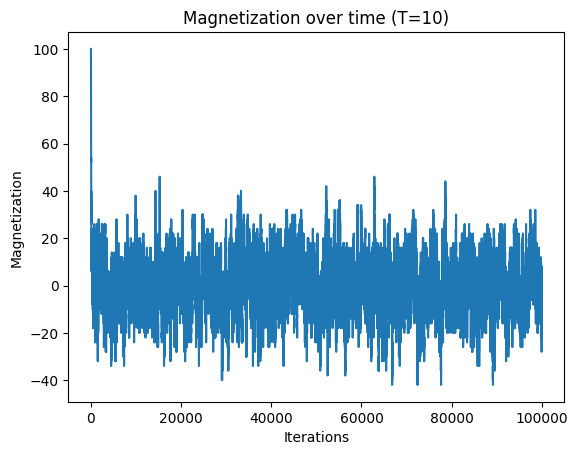

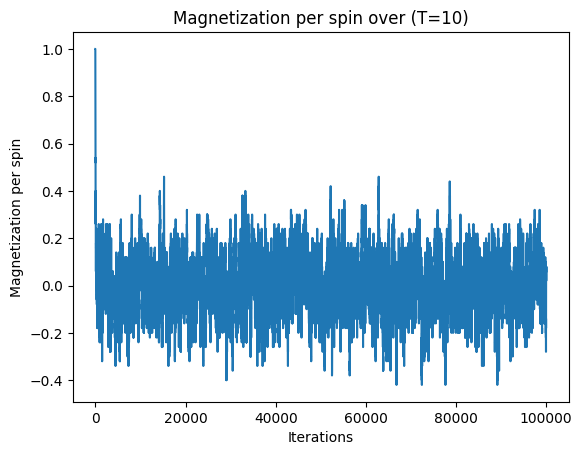

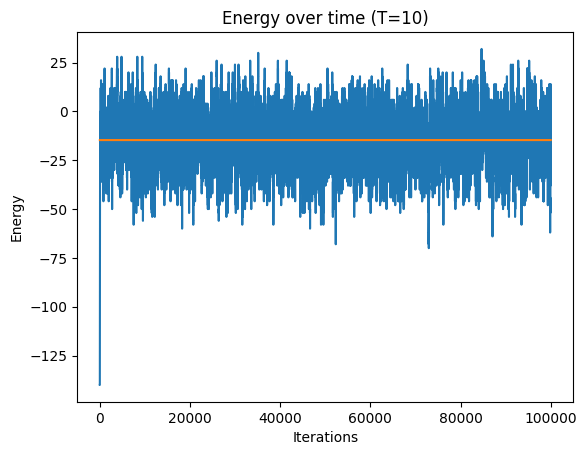

In [31]:
import matplotlib.pylab as plt

min = 0
max = iterations

xAxis = np.arange(min,max)

plt.figure()
plt.plot(xAxis, M[min:max])
plt.xlabel('Iterations')
plt.ylabel('Magnetization')
plt.title('Magnetization over time (T=' + str(temperature) + ')')

plt.figure()
plt.plot(xAxis, m[min:max])
plt.xlabel('Iterations')
plt.ylabel('Magnetization per spin')
plt.title('Magnetization per spin over (T=' + str(temperature) + ')')

plt.figure()
plt.plot(xAxis, E[min:max])
mean = np.full(max-min, np.mean(E[min:max]))
plt.plot(xAxis, mean)
plt.xlabel('Iterations')
plt.ylabel('Energy')
plt.title('Energy over time (T=' + str(temperature) + ')')

np.mean(E)